<a href="https://colab.research.google.com/github/Vishita7/Deep-Learning/blob/main/Town_Economic_data_Vishita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Town Economic Data 
####Whether or not Massachussetts economic data was able to predict Connecticut economic data?




---------------------------------------------------------------------------



In [ ]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting
#data pre-processing
from sklearn.preprocessing import MinMaxScaler
#RFR
from sklearn.ensemble import RandomForestRegressor 
# Regression Error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# 1.   Import the data, mount your Drive, print df.shape, and use df.info() to look for any missing values.

![MA image](https://upload.wikimedia.org/wikipedia/commons/7/7e/Towns_income_per_capita_in_MA.jpg)

Figure: Map of locations by per capita income. Areas with higher levels of income are shaded darker.

* https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read data from link
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_Massachusetts_locations_by_per_capita_income')[2]
df

,Rank,Municipality,Type,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,Weston,Town,Middlesex,"$105,217","$256,300","$250,000+",11261,10769
1,2,Dover,Town,Norfolk,"$89,476","$187,829","$193,750",6279,5891
2,3,Sherborn,Town,Middlesex,"$82,550","$172,750","$177,845",4301,3541
3,4,Brookline,Town,Norfolk,"$77,585","$160,034","$175,833",59180,38431
4,5,Newton,City,Middlesex,"$73,420","$223,444","$164,063",88593,78427
...,...,...,...,...,...,...,...,...,...
292,296,Amherst,Town,Hampshire,"$19,796","$53,191","$96,733",38651,8583
293,297,Springfield,City,Hampden,"$18,133","$34,311","$39,535",153428,55894
294,298,Lawrence,City,Essex,"$16,987","$32,851","$36,073",76820,26455
295,299,Pelham,Town,Hampshire,"$50,637","$82,596","$94,688",1353,575


In [ ]:
#data shape and data type 
print("The data set has {} rows and {} columns" .format(df.shape[0], df.shape[1]))
print('\n')
display(df.describe())
print('\n')
display(df.dtypes.value_counts())
print('\n')
print(df.info())




The data set has 297 rows and 9 columns




,Rank,Population,Number ofhouseholds
count,297.000000,297.000000,297.000000
mean,150.797980,20370.808081,9239.178451
std,87.134097,42217.128219,17561.297606
min,1.000000,75.000000,60.000000
25%,75.000000,4398.000000,1544.000000
50%,152.000000,11191.000000,4911.000000
75%,226.000000,23726.000000,11226.000000
max,300.000000,629182.000000,249414.000000


object    6
int64     3
dtype: int64



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   297 non-null    int64 
 1   Municipality           297 non-null    object
 2   Type                   297 non-null    object
 3   County                 297 non-null    object
 4   Per capitaincome       297 non-null    object
 5   Medianhouseholdincome  297 non-null    object
 6   Medianfamilyincome     297 non-null    object
 7   Population             297 non-null    int64 
 8   Number ofhouseholds    297 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 21.0+ KB
None


# 2. Clean the data. Remove special characters like $ , and + and coerce appropriate columns to numeric.

In [ ]:
# Data type 
print(df.dtypes)
print('\n')
#Null Value Counts
print(df.isnull().sum())
print('\n')
#Column Names
print(df.columns)

Rank                      int64
Municipality             object
Type                     object
County                   object
Per capitaincome         object
Medianhouseholdincome    object
Medianfamilyincome       object
Population                int64
Number ofhouseholds       int64
dtype: object


Rank                     0
Municipality             0
Type                     0
County                   0
Per capitaincome         0
Medianhouseholdincome    0
Medianfamilyincome       0
Population               0
Number ofhouseholds      0
dtype: int64


Index(['Rank', 'Municipality', 'Type', 'County', 'Per capitaincome',
       'Medianhouseholdincome', 'Medianfamilyincome', 'Population',
       'Number ofhouseholds'],
      dtype='object')


In [ ]:
# data cleaning and Removing special Charaters
def cast_data_type(col):
  new_col = col.replace(',','').replace('$', '').replace('+','')
  return float(new_col)
df['Per capitaincome']=df['Per capitaincome'].apply(cast_data_type)
df['Medianhouseholdincome']=df['Medianhouseholdincome'].apply(cast_data_type)
df['Medianfamilyincome']=df['Medianfamilyincome'].apply(cast_data_type)
print(df.dtypes)
print('\n')
print(df.describe())



Rank                       int64
Municipality              object
Type                      object
County                    object
Per capitaincome         float64
Medianhouseholdincome    float64
Medianfamilyincome       float64
Population                 int64
Number ofhouseholds        int64
dtype: object


             Rank  Per capitaincome  Medianhouseholdincome  \
count  297.000000        297.000000             297.000000   
mean   150.797980      37639.572391           77679.569024   
std     87.134097      12769.248281           29136.038674   
min      1.000000      16987.000000           30833.000000   
25%     75.000000      30466.000000           59186.000000   
50%    152.000000      34466.000000           72273.000000   
75%    226.000000      39414.000000           87900.000000   
max    300.000000     105217.000000          256300.000000   

       Medianfamilyincome     Population  Number ofhouseholds  
count          297.000000     297.000000           297.000000  


In [ ]:
# Encoding Categorical values into integer values
df.Type.unique()
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Type']= label_encoder.fit_transform(df['Type'])
df['Type'].unique()

array([2, 0, 1])

# 3. Assign Y = to df['Per capitaincome'].


In [ ]:
# variable assigned 
y= df['Per capitaincome']

# 4. Subset columns for modeling

* Type
* Population
* Number ofhouseholds

  **Useful link for subsetting rows and columns:** https://www.kdnuggets.com/2019/06/select-rows-columns-pandas.html

In [ ]:
x= df.loc[:,['Type','Population','Number ofhouseholds']]
x

,Type,Population,Number ofhouseholds
0,2,11261,10769
1,2,6279,5891
2,2,4301,3541
3,2,59180,38431
4,0,88593,78427
...,...,...,...
292,2,38651,8583
293,0,153428,55894
294,0,76820,26455
295,2,1353,575


# 5. Split into X_train, X_test, y_train, y_test.
Use an 80/20 split, shuffle the data, and random state equal to YOUR STUDENT ID. Print the shape of X_train, X_test, y_train, y_test.

Convert X_train, X_test, y_train and y_test into numpy arrays. Just overwrite the variables with the numpy arrays like we did in class

In [ ]:
#80/20 data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle= True, random_state= 3003002)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(237, 3) (60, 3) (237,) (60,)


In [ ]:
# Test and train data arrays
X_test.to_numpy()
X_train.to_numpy()
y_train.to_numpy()
y_test.to_numpy()

array([38682., 33092., 39447., 50637., 82550., 89476., 39675., 33189.,
       27657., 30955., 29109., 36094., 21257., 63872., 34857., 55322.,
       29740., 28172., 70876., 37498., 34717., 34746., 34910., 26415.,
       34832., 49549., 20522., 36471., 30670., 48725., 69734., 23327.,
       35479., 25741., 23410., 34580., 30474., 33131., 35134., 32361.,
       32734., 22620., 37737., 36894., 48611., 34454., 54596., 29525.,
       33177., 35081., 24330., 34649., 34459., 27853., 26092., 21942.,
       32805., 33695., 34367., 52275.])

# 6. Use fit_transform() from MinMaxScaler on X_train. Use transform() to apply the MinMaxScaler to X_test.


In [ ]:
#data preprocessing
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) #Fit_transform
X_test = scaler.transform(X_test) #transform 

# 7. Fit a random forest model on X_train. Call your model object `clf`. 

Then create two new variables, `train_preds` and `test_preds`, which are the predictions from your model. For example, you will use `train_preds = clf.predict(X_train)` for `X_train` . Calculate error metrics of MAE and R2 for train and test results.

In [ ]:
#RFR model and error metrics
clf = RandomForestRegressor()
clf = clf.fit(X_train, y_train)
train_preds = clf.predict(X_train) 
test_preds = clf.predict(X_test) 

# 1) R2 value - for Random Forest Regression
print("This is train R2 (clf):", r2_score(y_train, train_preds))
print("This is test R2 (clf):", r2_score(y_test, test_preds)) 

# 2) mae - for RF Regression
trainMAE_clf = mean_absolute_error(y_train, train_preds)
print("This is trainMAE (clf):", trainMAE_clf) # train
testMAE_clf = mean_absolute_error(y_test, test_preds)
print("This is testMAE (clf):", testMAE_clf) # test

This is train R2 (clf): 0.8827158783595681
This is test R2 (clf): 0.29164329036948144
This is trainMAE (clf): 2912.6870886075953
This is testMAE (clf): 7695.281666666668


# 8. Make two scatterplots of actual vs. predicted. One for train results, one for test results. 
With nicely labeled title and axis (like we did in class).

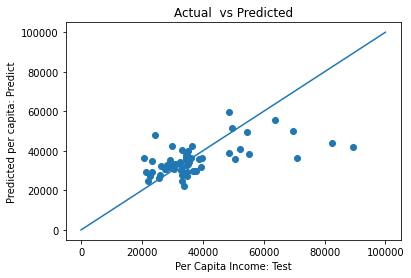

In [ ]:

#Scatterplot
plt.scatter(y_test, test_preds)
plt.plot(range(100000),range(100000))
plt.xlabel("Per Capita Income: Test")
plt.ylabel("Predicted per capita: Predict")
plt.title("Actual  vs Predicted")
plt.show()

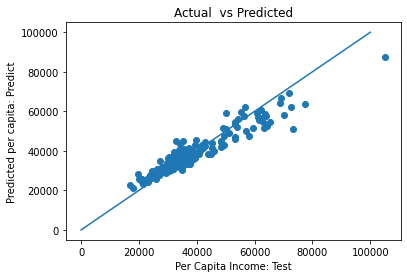

In [ ]:
plt.scatter(y_train, train_preds)
plt.plot(range(100000),range(100000))
plt.xlabel("Per Capita Income: Test")
plt.ylabel("Predicted per capita: Predict")
plt.title("Actual  vs Predicted")
plt.show()

# 9. Apply and evaluate your fitted model to ALL town-level data in Connecticut.

This will require you to prep this new dataset the same way as you did for Massachussetts. Luckily, you should be able to copy/paste most code! You can treat this as another holdout partition - use all rows but only the subset of columns that were used in your model. 

Calculate error metrics and make one scatterplot of actual vs. predicted results for this new holdout sample.

![CT econ data](https://upload.wikimedia.org/wikipedia/commons/6/6d/Connecticut_Towns_by_Median_Household_Income.png)

Figure: Map of municipalities by median household income (ACS 2015-2019). Areas with higher income are shaded more blue, areas with lower income are shaded more red.

*https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income

In [ ]:
#read data from the link
ctData = pd.read_html('https://en.wikipedia.org/wiki/List_of_Connecticut_locations_by_per_capita_income')[2]
ctData

,Rank,Town,Unnamed: 2,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,New Canaan,Town,Fairfield,"$105,846","$174,611","$211,875",19738,6857
1,2.0,Darien,Town,Fairfield,"$105,846","$208,848","$343,456",20732,6555
2,3.0,Greenwich,Town,Fairfield,"$90,087","$128,153","$167,825",61171,22083
3,4.0,Weston,Town,Fairfield,"$92,794","$219,868","$285,612",10179,3379
4,5.0,Westport,Town,Fairfield,"$97,395","$181,360","$237,353",26391,9740
...,...,...,...,...,...,...,...,...,...
174,174.0,New London,City,New London,"$21,110","$43,551","$49,811",27620,10373
175,175.0,New Britain,City,Hartford,"$21,056","$39,706","$45,990",73206,28158
176,176.0,Windham,Town,Windham,"$20,272","$40,063","$48,145",25268,8906
177,177.0,Bridgeport,City,Fairfield,"$19,854","$41,047","$47,894",144229,51255


In [ ]:
#data columns and renaming 
print(ctData.columns)
print('\n')
ctData= ctData.rename(columns={'Unnamed: 2': 'H_Type'})
print(ctData)
print('\n')
print(ctData['H_Type'].unique())
print('\n')
print(ctData.info())


Index(['Rank', 'Town', 'Unnamed: 2', 'County', 'Per capitaincome',
       'Medianhouseholdincome', 'Medianfamilyincome', 'Population',
       'Number ofhouseholds'],
      dtype='object')


      Rank         Town H_Type      County Per capitaincome  \
0      1.0   New Canaan   Town   Fairfield         $105,846   
1      2.0       Darien   Town   Fairfield         $105,846   
2      3.0    Greenwich   Town   Fairfield          $90,087   
3      4.0       Weston   Town   Fairfield          $92,794   
4      5.0     Westport   Town   Fairfield          $97,395   
..     ...          ...    ...         ...              ...   
174  174.0   New London   City  New London          $21,110   
175  175.0  New Britain   City    Hartford          $21,056   
176  176.0      Windham   Town     Windham          $20,272   
177  177.0   Bridgeport   City   Fairfield          $19,854   
178  178.0     Hartford   City    Hartford          $16,798   

    Medianhouseholdincome Medianfamilyincome  Populat

In [ ]:
#Encoding Categorical values into integer values
ctData['H_Type']= label_encoder.fit_transform(ctData['H_Type'])
ctData['H_Type'].unique()

array([4, 0, 1, 3, 2])

In [ ]:
#data shape 
print("The data set has {} rows and {} columns" .format(ctData.shape[0], ctData.shape[1]))
print('\n')
display(ctData.describe())
display(ctData.dtypes.value_counts())

The data set has 179 rows and 9 columns




,Rank,H_Type,Population,Number ofhouseholds
count,177.000000,179.000000,1.790000e+02,1.790000e+02
mean,89.050847,3.430168,1.765114e+06,6.673667e+05
std,51.651616,1.253931,2.307524e+07,8.723234e+06
min,1.000000,0.000000,7.590000e+02,3.340000e+02
25%,45.000000,4.000000,4.853000e+03,1.924500e+03
50%,88.000000,4.000000,1.243500e+04,4.783000e+03
75%,134.000000,4.000000,2.605000e+04,9.020500e+03
max,178.000000,4.000000,3.087455e+08,1.167163e+08


object     5
int64      3
float64    1
dtype: int64

In [ ]:
# Removing special Charaters and coercing datatype to integer
def cast_ctData_type(col):
  new_Ctcol = col.replace(',','').replace('$', '').replace('+','')
  return float(new_Ctcol)
ctData['Per capitaincome']=ctData['Per capitaincome'].apply(cast_ctData_type)
ctData['Medianhouseholdincome']=ctData['Medianhouseholdincome'].apply(cast_ctData_type)
ctData['Medianfamilyincome']=ctData['Medianfamilyincome'].apply(cast_ctData_type)
ctData.dtypes

Rank                     float64
Town                      object
H_Type                     int64
County                    object
Per capitaincome         float64
Medianhouseholdincome    float64
Medianfamilyincome       float64
Population                 int64
Number ofhouseholds        int64
dtype: object

In [ ]:
y_ctest= ctData['Per capitaincome']
x_ctest= ctData.loc[:,['H_Type','Population','Number ofhouseholds']] 
#test and train data array
x_ctest.to_numpy()




array([[        4,     19738,      6857],
       [        4,     20732,      6555],
       [        4,     61171,     22083],
       [        4,     10179,      3379],
       [        4,     26391,      9740],
       [        4,     34427,     13121],
       [        4,     24638,      8902],
       [        4,     18062,      5953],
       [        4,     17550,      6872],
       [        4,     22290,      7318],
       [        4,      9158,      3528],
       [        4,      2262,       922],
       [        0,      2406,      1077],
       [        0,       929,       508],
       [        4,      7490,      2682],
       [        4,      1727,       753],
       [        4,      6683,      2992],
       [        4,     18098,      7024],
       [        4,     59404,     20233],
       [        4,     15502,      5238],
       [        4,      7603,      3145],
       [        4,     18269,      6779],
       [        4,      3578,      1466],
       [        4,      2979,     

In [ ]:
#MinMaxScaler data transforming
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model=scaler.fit(x_ctest)
X_ctest = model.transform(x_ctest)  #tranform
X_ctest

array([[1.00000000e+00, 6.14714848e-05, 5.58878161e-05],
       [1.00000000e+00, 6.46909725e-05, 5.33003379e-05],
       [1.00000000e+00, 1.95669706e-04, 1.86341271e-04],
       [1.00000000e+00, 3.05106374e-05, 2.60889775e-05],
       [1.00000000e+00, 8.30200274e-05, 8.05888086e-05],
       [1.00000000e+00, 1.09047998e-04, 1.09556570e-04],
       [1.00000000e+00, 7.73421986e-05, 7.34089849e-05],
       [1.00000000e+00, 5.60430530e-05, 4.81425171e-05],
       [1.00000000e+00, 5.43847253e-05, 5.60163333e-05],
       [1.00000000e+00, 6.97372117e-05, 5.98375759e-05],
       [1.00000000e+00, 2.72036989e-05, 2.73655810e-05],
       [1.00000000e+00, 4.86809851e-06, 5.03787151e-06],
       [0.00000000e+00, 5.33450316e-06, 6.36588186e-06],
       [0.00000000e+00, 5.50616598e-07, 1.49079871e-06],
       [1.00000000e+00, 2.18011784e-05, 2.01172148e-05],
       [1.00000000e+00, 3.13527569e-06, 3.58991184e-06],
       [1.00000000e+00, 1.91873690e-05, 2.27732355e-05],
       [1.00000000e+00, 5.61596

In [ ]:
#To predict values for Connecticut town-level data, the CLF model from the Massachusetts economic data modeling in Q.1 is used
test_preds_ct = clf.predict(X_ctest) 

# R2 value for Random Forest Regression
print("This is test R2 (clf):", r2_score(y_ctest, test_preds_ct)) 

# MAE for Random Forest Regression
testMAE_clf = mean_absolute_error(y_ctest, test_preds_ct)
print("This is testMAE (clf):", testMAE_clf) # test

This is test R2 (clf): -0.7858851106813427
This is testMAE (clf): 14393.93938547486


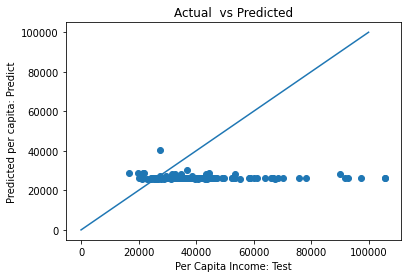

In [ ]:
#ct_Test Scatterplot
plt.scatter(y_ctest, test_preds_ct)
plt.plot(range(100000),range(100000))
plt.xlabel("Per Capita Income: Test")
plt.ylabel("Predicted per capita: Predict")
plt.title("Actual  vs Predicted")
plt.show()

RMSE: 20481.371978017924 


AxesSubplot(0.125,0.125;0.775x0.755)


AxesSubplot(0.125,0.125;0.775x0.755)


pd.concat([predicted, expected, error ], axis=1, ignore_index=True


pd.concat([predicted.describe(), expected.describe()], axis=1, ignore_index=True


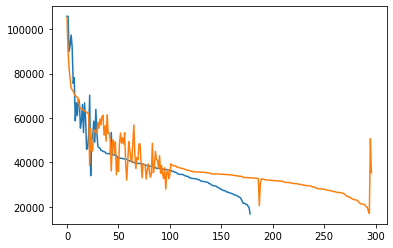

In [ ]:
# Outcome Analysis and comparision
predicted = pd.DataFrame(test_preds_ct)
expected= pd.DataFrame(y_ctest)
error= pd.DataFrame(predicted.values- expected.values)
print("RMSE: %r " % np.sqrt(np.mean((test_preds_ct - y_ctest) ** 2)))
print('\n')
print(ctData['Per capitaincome'].plot())
print('\n')
print(df['Per capitaincome'].plot() )
print('\n')
print('pd.concat([predicted, expected, error ], axis=1, ignore_index=True')
print('\n')
print('pd.concat([predicted.describe(), expected.describe()], axis=1, ignore_index=True')


# 10. Five good bullets
Write five good bullets about whether or not Massachussetts economic data was able to predict Connecticut economic data.

 
1.   The Random Forest Regression model trained on Massachusetts economic data was not able to predict Connecticut economic data efficiently.
2.   The R^2 for CT test data is -0.83 suggesting that the model trained on MT data is insufficient to fit CT data.
3.   The Mean Absolute Error value for the CT test data is 14698.081, which is extremely high and supports the above comments that are made.  
4.   Additionally, the RMSE value for the test data was 20735.44, which indicates that this model does not fit CT data.
5.   Unlike linear regression models, Random Forest Regressors cannot extrapolate. Therefore, the predicted values will be within the range of the training data set. The MT per capita income distribution range is different from the CT per capita income distribution, so the Random Forest regressor may not be performing efficiently on CT test data.




   

